## IMPORTANDO BIBLIOTECAS

In [116]:
import pandas as pd

## CARREGANDO OS DADOS

In [117]:
df_listing = pd.read_csv(r"H:\Meu Drive\PESSOAL\PROJETOS\Desafio-Organizando-e-analisando-dados-de-um-Airbnb\listings_cleaned.csv")

df_reviwes = pd.read_csv(r"H:\Meu Drive\PESSOAL\PROJETOS\Desafio-Organizando-e-analisando-dados-de-um-Airbnb\reviews.csv")

## LIMPEZA E TRATAMENTO

In [118]:
df_listing.head() # --CONHECENDO OS DADOS--

,id,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price
0,271975,Vidigal,Entire home/apt,4,1.0,2.0,2.0,236.0
1,272335,Copacabana,Entire home/apt,4,1.0,1.0,1.0,723.0
2,272631,Copacabana,Private room,2,1.0,1.0,2.0,1146.0
3,273261,Leblon,Entire home/apt,6,3.5,3.0,3.0,6742.0
4,273363,Santa Teresa,Private room,1,1.0,1.0,1.0,61.0


In [119]:
df_listing.info() # --INFORMAÇÕES DOS DADOS--

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39499 entries, 0 to 39498
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      39499 non-null  int64  
 1   neighbourhood_cleansed  39499 non-null  object 
 2   room_type               39499 non-null  object 
 3   accommodates            39499 non-null  int64  
 4   bathrooms               36609 non-null  float64
 5   bedrooms                38976 non-null  float64
 6   beds                    36630 non-null  float64
 7   price                   36644 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 2.4+ MB


In [120]:
df_listing.dtypes # --TIPOS DE DADOS--

id                          int64
neighbourhood_cleansed     object
room_type                  object
accommodates                int64
bathrooms                 float64
bedrooms                  float64
beds                      float64
price                     float64
dtype: object

In [121]:
df_listing["id"].value_counts() # --VERIFICANDO VALORES DUPLICADOS NA COLUNA ID--

id
271975                 1
272335                 1
272631                 1
273261                 1
273363                 1
                      ..
1319593870376466401    1
1319611826461021550    1
1319620401959854025    1
1319650312466603776    1
1319654458578424849    1
Name: count, Length: 39499, dtype: int64

In [122]:
df_listing.shape # --VERIFICANDO DIMENSÕES DO DATAFRAME--

(39499, 8)

In [123]:
df_listing.isnull().sum() # --VERIFICANDO VALORES NULOS NO DATAFRAME--

id                           0
neighbourhood_cleansed       0
room_type                    0
accommodates                 0
bathrooms                 2890
bedrooms                   523
beds                      2869
price                     2855
dtype: int64

In [124]:
(df_listing.isnull().sum() / df_listing.shape[0] * 100).sort_values(ascending=False) # --PORCENTAGEM DE VALORES NULOS NO DATAFRAME--

bathrooms                 7.316641
beds                      7.263475
price                     7.228031
bedrooms                  1.324084
accommodates              0.000000
room_type                 0.000000
neighbourhood_cleansed    0.000000
id                        0.000000
dtype: float64

In [125]:
df_listing[["bathrooms", "bedrooms", "beds", "price"]] # --VERIFICANDO COLUNAS NUMÉRICAS COM VALORES NULOS--

,bathrooms,bedrooms,beds,price
0,1.0,2.0,2.0,236.0
1,1.0,1.0,1.0,723.0
2,1.0,1.0,2.0,1146.0
3,3.5,3.0,3.0,6742.0
4,1.0,1.0,1.0,61.0
...,...,...,...,...
39494,2.0,1.0,2.0,957.0
39495,1.0,1.0,1.0,288.0
39496,1.0,1.0,4.0,672.0
39497,1.5,2.0,1.0,1083.0


### Preenchendo dados nulos

In [126]:
df_listing["bedrooms"].fillna(1, inplace=True) # --PREENCHENDO VALORES NULOS NA COLUNA BEDROOMS COM O VALOR 1--
df_listing["bathrooms"].fillna(1, inplace=True) # --PREENCHENDO VALORES NULOS NA COLUNA BATHROOMS COM O VALOR 1--
df_listing["beds"].fillna(1, inplace=True) # --PREENCHENDO VALORES NULOS NA COLUNA BEDS COM O VALOR 1--

In [127]:
df_listing.isnull().sum() # --VERIFICANDO VALORES NULOS NO DATAFRAME--

id                           0
neighbourhood_cleansed       0
room_type                    0
accommodates                 0
bathrooms                    0
bedrooms                     0
beds                         0
price                     2855
dtype: int64

In [128]:
df_listing["price"].fillna(df_listing["price"].median(), inplace=True) # --PREENCHENDO VALORES NULOS NA COLUNA PRICE COM A MEDIANA DA COLUNA--

In [129]:
df_listing.isnull().sum() # --VERIFICANDO VALORES NULOS NO DATAFRAME--

id                        0
neighbourhood_cleansed    0
room_type                 0
accommodates              0
bathrooms                 0
bedrooms                  0
beds                      0
price                     0
dtype: int64

In [130]:
df_listing.head() # --DADOS APÓS TRATAMENTO DE VALORES NULOS--

,id,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price
0,271975,Vidigal,Entire home/apt,4,1.0,2.0,2.0,236.0
1,272335,Copacabana,Entire home/apt,4,1.0,1.0,1.0,723.0
2,272631,Copacabana,Private room,2,1.0,1.0,2.0,1146.0
3,273261,Leblon,Entire home/apt,6,3.5,3.0,3.0,6742.0
4,273363,Santa Teresa,Private room,1,1.0,1.0,1.0,61.0


In [131]:
df_reviwes.head() # --CONHECENDO OS DADOS DO DATAFRAME REVIEWS--

,id,number_of_reviews,review_scores_rating
0,272335,367,4.92
1,272631,32,5.00
2,273363,5,5.00
3,273463,654,4.83
4,273496,60,4.80


In [132]:
df_reviwes.info() # --INFORMAÇÕES DOS DADOS DO DATAFRAME REVIEWS--

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32695 entries, 0 to 32694
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    32695 non-null  int64  
 1   number_of_reviews     32695 non-null  int64  
 2   review_scores_rating  32695 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 766.4 KB


In [133]:
df_reviwes.isnull().sum() # --VERIFICANDO VALORES NULOS NO DATAFRAME REVIEWS--

id                      0
number_of_reviews       0
review_scores_rating    0
dtype: int64

In [134]:
df_reviwes["id"].value_counts() # --VERIFICANDO VALORES DUPLICADOS NA COLUNA ID DO DATAFRAME REVIEWS--

id
272335      1
272631      1
273363      1
273463      1
273496      1
           ..
842292      1
730997      1
857217      1
749237      1
25533793    1
Name: count, Length: 32695, dtype: int64

In [135]:
df_final = pd.merge(df_listing, df_reviwes, left_on='id', right_on='id', how='inner') # --REALIZANDO O MERGE ENTRE OS DOIS DATAFRAMES--

In [136]:
df_final.head(10) # --DADOS DO DATAFRAME FINAL APÓS O MERGE--

,id,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating
0,272335,Copacabana,Entire home/apt,4,1.0,1.0,1.0,723.0,367,4.920000
1,272631,Copacabana,Private room,2,1.0,1.0,2.0,1146.0,32,5.000000
2,273261,Leblon,Entire home/apt,6,3.5,3.0,3.0,6742.0,0,4.812309
3,273363,Santa Teresa,Private room,1,1.0,1.0,1.0,61.0,5,5.000000
4,273463,Lagoa,Entire home/apt,6,2.0,2.0,6.0,1411.0,654,4.830000
5,273496,Leblon,Entire home/apt,6,2.5,2.0,5.0,703.0,60,4.800000
6,273753,Santa Teresa,Private room,1,1.0,1.0,1.0,59.0,4,4.500000
7,274116,Santa Teresa,Entire home/apt,3,1.0,1.0,2.0,225.0,48,4.920000
8,278679,Copacabana,Entire home/apt,2,1.0,0.0,1.0,759.0,59,4.850000
9,17878,Copacabana,Entire home/apt,5,1.0,2.0,2.0,1471.0,327,4.700000


In [137]:
df_final.shape

(32695, 10)

In [138]:
df_final.dtypes

id                          int64
neighbourhood_cleansed     object
room_type                  object
accommodates                int64
bathrooms                 float64
bedrooms                  float64
beds                      float64
price                     float64
number_of_reviews           int64
review_scores_rating      float64
dtype: object

In [139]:
df_final["id"] = df_final["id"].astype(str) # --CONVERTENDO A COLUNA ID PARA STRING--
df_final["bathrooms"] = df_final["bathrooms"].astype(int) # --CONVERTENDO A COLUNA BATHROOMS PARA INTEIRO--
df_final["bedrooms"] = df_final["bedrooms"].astype(int) # --CONVERTENDO A COLUNA BEDROOMS PARA INTEIRO--
df_final["beds"] = df_final["beds"].astype(int) # --CONVERTENDO A COLUNA BEDS PARA INTEIRO--

In [140]:
df_final.dtypes # --VERIFICANDO OS TIPOS DE DADOS DO DATAFRAME FINAL--

id                         object
neighbourhood_cleansed     object
room_type                  object
accommodates                int64
bathrooms                   int64
bedrooms                    int64
beds                        int64
price                     float64
number_of_reviews           int64
review_scores_rating      float64
dtype: object

In [141]:
df_final.shape

(32695, 10)

In [142]:
df_final.head()

,id,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating
0,272335,Copacabana,Entire home/apt,4,1,1,1,723.0,367,4.920000
1,272631,Copacabana,Private room,2,1,1,2,1146.0,32,5.000000
2,273261,Leblon,Entire home/apt,6,3,3,3,6742.0,0,4.812309
3,273363,Santa Teresa,Private room,1,1,1,1,61.0,5,5.000000
4,273463,Lagoa,Entire home/apt,6,2,2,6,1411.0,654,4.830000


## IDENTIFICANDO E TRATANDO OUTLIERS

In [143]:
df_final.columns

Index(['id', 'neighbourhood_cleansed', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'number_of_reviews',
       'review_scores_rating'],
      dtype='object')

In [144]:
colunas_numericas = ["accommodates", "bathrooms", "bedrooms", "beds", "price", "number_of_reviews", "review_scores_rating"]

In [145]:
df_final = df_final[df_final["price"] > 0] # --MANTENDO APENAS VALORES MAIORES QUE 0--

In [146]:
df_final[df_final["price"] < 0].sum() # --REMOVENDO OUTLIERS MAIORES QUE 1000 NA COLUNA PRICE--

id                          0
neighbourhood_cleansed      0
room_type                   0
accommodates                0
bathrooms                   0
bedrooms                    0
beds                        0
price                     0.0
number_of_reviews           0
review_scores_rating      0.0
dtype: object

<Axes: >

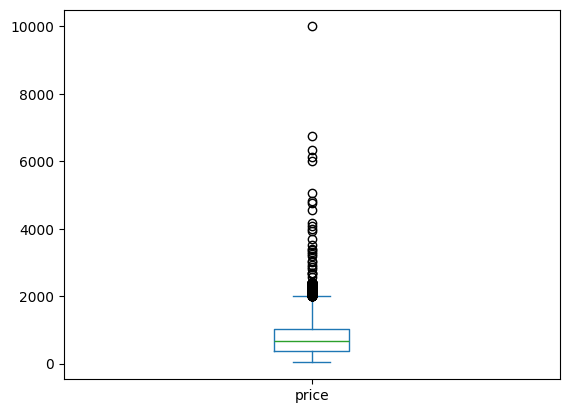

In [147]:
df_final['price'].plot(kind='box') # --IDENTIFICANDO OUTLIERS NA COLUNA ID--

In [148]:
Q1 = df_final['price'].quantile(0.25)
Q3 = df_final['price'].quantile(0.75)

In [149]:
IQR = Q3 - Q1

In [150]:
limite_superior = Q1 + 1.5 * IQR
# Ajustar o limite inferior para zero
limite_inferior = max(0, Q1 - 1.5 * IQR)

In [151]:
limite_superior

np.float64(1361.0)

In [152]:
limite_inferior

0

In [153]:
outliers = df_final[(df_final['price'] < limite_inferior) | (df_final['price'] > limite_superior)]  # --IDENTIFICANDO OUTLIERS NA COLUNA PRICE--

In [154]:
outliers.shape  #--VERIFICANDO A QUANTIDADE DE OUTLIERS IDENTIFICADOS NA COLUNA PRICE--

(4580, 10)

In [155]:
outliers 

,id,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating
2,273261,Leblon,Entire home/apt,6,3,3,3,6742.0,0,4.812309
4,273463,Lagoa,Entire home/apt,6,2,2,6,1411.0,654,4.830000
9,17878,Copacabana,Entire home/apt,5,1,2,2,1471.0,327,4.700000
12,48305,Ipanema,Entire home/apt,13,7,6,7,3532.0,180,4.760000
14,50759,Barra da Tijuca,Entire home/apt,14,7,6,10,6000.0,7,4.570000
...,...,...,...,...,...,...,...,...,...,...
32659,1319021923364630190,Barra da Tijuca,Entire home/apt,4,2,2,2,1691.0,0,4.812309
32664,1319072821080331166,Copacabana,Entire home/apt,6,2,3,3,2243.0,0,4.812309
32675,1319486840297707346,Leblon,Entire home/apt,2,1,1,1,1550.0,0,4.812309
32679,1319513480511154436,Flamengo,Entire home/apt,8,2,2,4,1543.0,0,4.812309


## REMOVENDO OUTLIERS

In [156]:
valores_outliers = outliers['price'].values
df_final_sem_outliers = df_final[~df_final['price'].isin(valores_outliers)]  # --REMOVENDO OUTLIERS DO DATAFRAME FINAL--

In [157]:
df_final.shape

(32695, 10)

In [158]:
df_final_sem_outliers.shape

(28115, 10)

## TRANSFORMANDO DADOS CATEGÓRICOS

In [159]:
df_final_sem_outliers.dtypes # --VERIFICANDO TIPOS DE DADOS APÓS REMOÇÃO DE OUTLIERS--

id                         object
neighbourhood_cleansed     object
room_type                  object
accommodates                int64
bathrooms                   int64
bedrooms                    int64
beds                        int64
price                     float64
number_of_reviews           int64
review_scores_rating      float64
dtype: object

In [160]:
df_final_sem_outliers['room_type'].value_counts() # --VERIFICANDO VALORES ÚNICOS NA COLUNA ROOM TYPE--

room_type
Entire home/apt    21609
Private room        6268
Shared room          225
Hotel room            13
Name: count, dtype: int64

In [163]:
df_final_sem_outliers['room_type_number'] = df_final_sem_outliers['room_type'].astype('category').cat.codes # --CONVERTENDO A COLUNA ROOM TYPE PARA CATEGÓRICA--

C:\Users\infor77\AppData\Local\Temp\ipykernel_28416\889815283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_sem_outliers['room_type_number'] = df_final_sem_outliers['room_type'].astype('category').cat.codes # --CONVERTENDO A COLUNA ROOM TYPE PARA CATEGÓRICA--


In [165]:
df_final_sem_outliers[['room_type', 'room_type_number']].value_counts()

room_type        room_type_number
Entire home/apt  0                   21609
Private room     2                    6268
Shared room      3                     225
Hotel room       1                      13
Name: count, dtype: int64

In [167]:
df_final_sem_outliers.head()

,id,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,room_type_number
0,272335,Copacabana,Entire home/apt,4,1,1,1,723.0,367,4.92,0
1,272631,Copacabana,Private room,2,1,1,2,1146.0,32,5.00,2
3,273363,Santa Teresa,Private room,1,1,1,1,61.0,5,5.00,2
5,273496,Leblon,Entire home/apt,6,2,2,5,703.0,60,4.80,0
6,273753,Santa Teresa,Private room,1,1,1,1,59.0,4,4.50,2


In [169]:
df_final_sem_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28115 entries, 0 to 32694
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      28115 non-null  object 
 1   neighbourhood_cleansed  28115 non-null  object 
 2   room_type               28115 non-null  object 
 3   accommodates            28115 non-null  int64  
 4   bathrooms               28115 non-null  int64  
 5   bedrooms                28115 non-null  int64  
 6   beds                    28115 non-null  int64  
 7   price                   28115 non-null  float64
 8   number_of_reviews       28115 non-null  int64  
 9   review_scores_rating    28115 non-null  float64
 10  room_type_number        28115 non-null  int8   
dtypes: float64(2), int64(5), int8(1), object(3)
memory usage: 2.4+ MB


In [168]:
df_final_sem_outliers.describe()

,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,room_type_number
count,28115.000000,28115.000000,28115.000000,28115.000000,28115.000000,28115.000000,28115.000000,28115.000000
mean,3.510759,1.260181,1.308163,2.043464,620.694078,24.277112,4.815611,0.470354
std,1.782148,0.641895,0.800292,1.563174,328.101435,46.505648,0.298864,0.862002
min,1.000000,0.000000,0.000000,0.000000,33.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,350.000000,1.000000,4.812309,0.000000
50%,3.000000,1.000000,1.000000,2.000000,586.000000,6.000000,4.830000,0.000000
75%,4.000000,1.000000,2.000000,3.000000,870.000000,27.000000,5.000000,0.000000
max,16.000000,20.000000,26.000000,50.000000,1361.000000,710.000000,5.000000,3.000000


In [166]:
df_final_sem_outliers.columns

Index(['id', 'neighbourhood_cleansed', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'number_of_reviews',
       'review_scores_rating', 'room_type_number'],
      dtype='object')